In [1]:
import numpy as np
import os

import random
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import astropy.units as u

import astropy.constants as const
import scipy.stats
from matplotlib.lines import Line2D
from scipy import integrate
import matplotlib.ticker as mtick

In [2]:
import sys
from s1s2_0311 import *
from read import *
from recoil_1223 import *


In [3]:
unit_pdf = (u.tonne*u.yr*u.keV)**(-1)
unit_Er = u.keV

In [4]:
spctrum_types = ['numu', 'nue', 'nutau']
numevent = 1000
nuclei = 'Xenon'
footnote = 'eMax5_thrd0p001'
folder = '../generate_S1S2files'

file = '../event_rate_per_ton_yr_keV.txt'
data = np.array(read_file_dataline(file))
Er_nucleus,dNdE_nue, dNdE_numu, dNdE_nutau = data

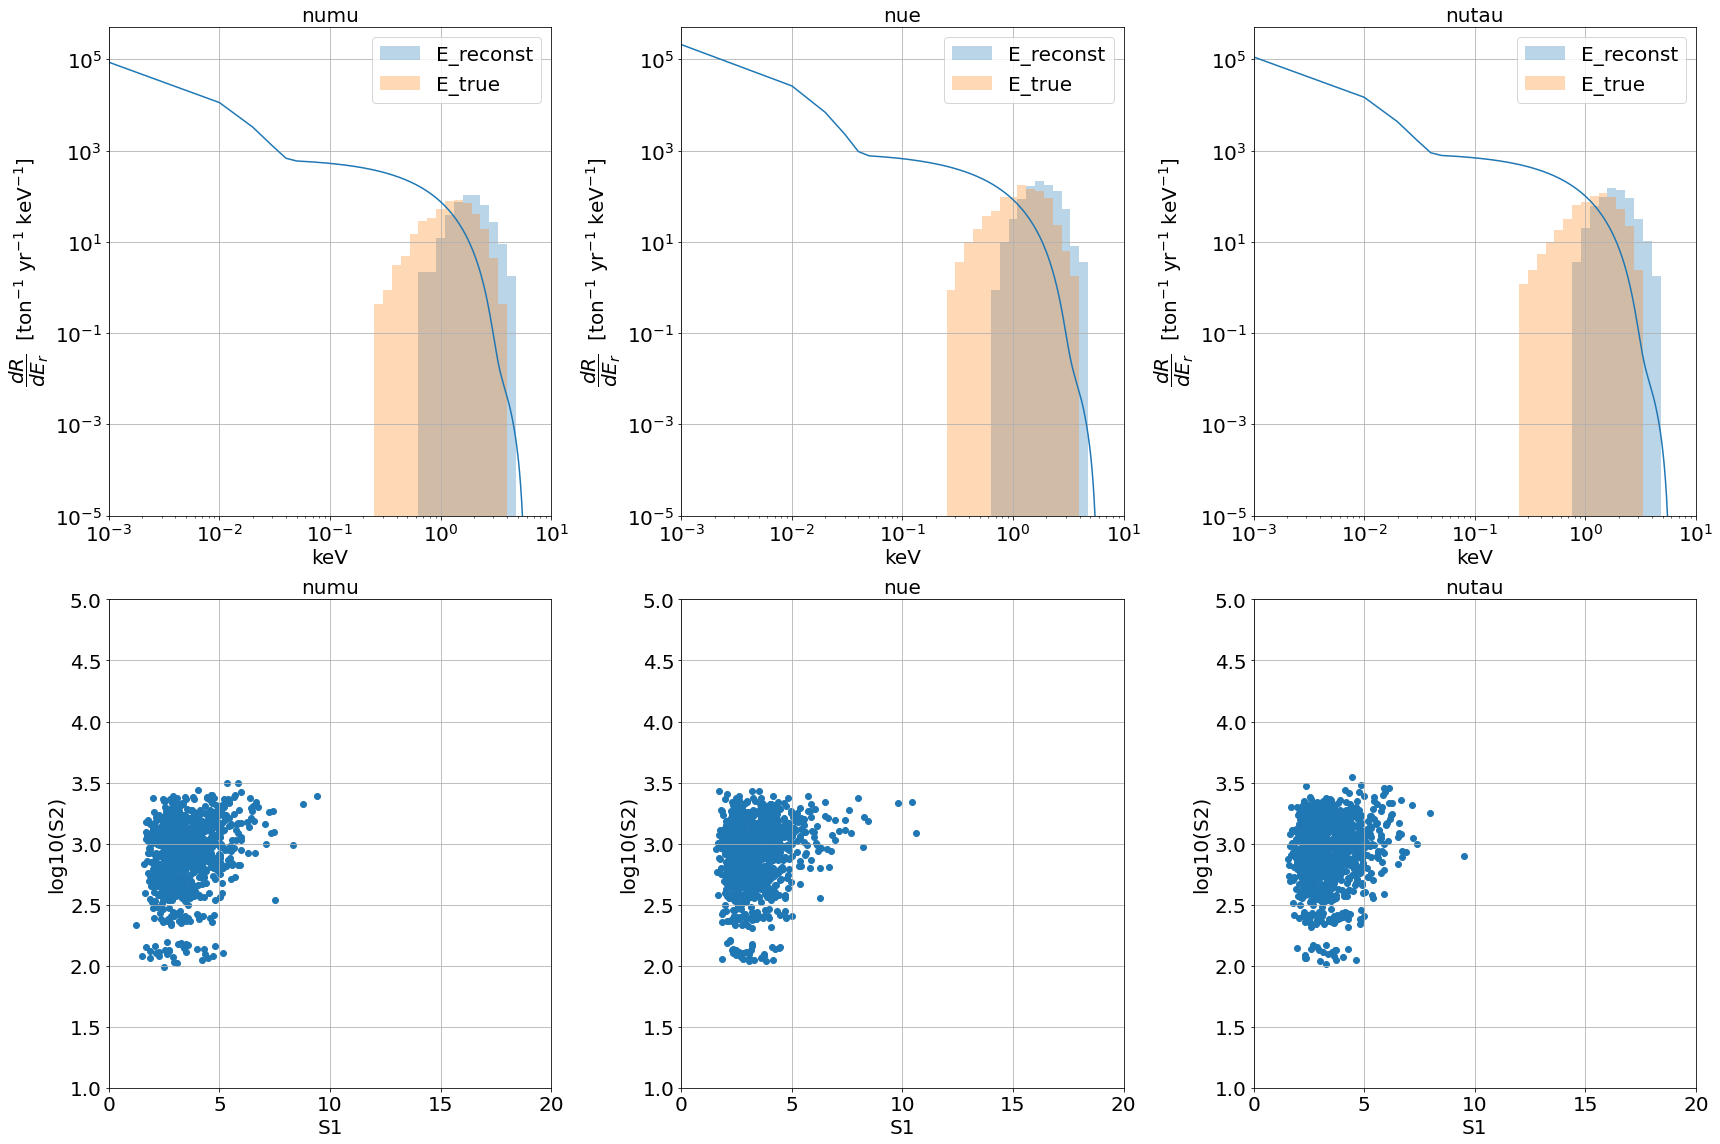

In [5]:
fig, ax = plt.subplots(2, len(spctrum_types), figsize = (8*len(spctrum_types), 8*2))

df = pd.DataFrame()
bins = np.logspace(np.log10(0.001), np.log10(10), 51)
bins_centers = (bins[1:]+bins[:-1])/2
df['Er [keV]'] = [str(bins[i])+'-'+str(bins[i+1]) for i in range(0, len(bins)-1)]
df['Er_centers [keV]'] = bins_centers

for p, spctrum_type in enumerate(spctrum_types):
    
    if spctrum_type == 'nue':
        valid_Er_keV, valid_pdf = Er_nucleus, dNdE_nue
    elif spctrum_type == 'numu':
        valid_Er_keV, valid_pdf = Er_nucleus, dNdE_numu
    elif spctrum_type == 'nutau':
        valid_Er_keV, valid_pdf = Er_nucleus, dNdE_nutau
    
    valid_Er_keV*=unit_Er
    valid_pdf*=unit_pdf
    eventR = max(get_cdf(valid_pdf[:-1], np.diff(valid_Er_keV), ''))

    data, eff_num = get_data(folder, spctrum_type, nuclei, numevent, footnote)
    E_reconst, S1, S2, _,_, E_true = data.T

    counts_reconst, _ = np.histogram(E_reconst, bins)
    counts_true, _ = np.histogram(E_true, bins)
    
    hist_reconst = counts_reconst/unit_Er/eff_num * eventR
    hist_true = counts_true/unit_Er/eff_num * eventR
    
    ax[0][p].bar(bins_centers, hist_reconst.value,  np.diff(bins), alpha = 0.3, label = 'E_reconst')
    ax[0][p].bar(bins_centers, hist_true.value,  np.diff(bins), alpha = 0.3, label = 'E_true')
    
    
    df[spctrum_type+' '+'reconst'+' ['+str(hist_reconst.unit)+']'] = hist_reconst.value
    df[spctrum_type+' '+'sim'+' ['+str(hist_true.unit)+']'] = hist_true.value
    
    ax[0][p].semilogy(valid_Er_keV, valid_pdf)
    ax[0][p].legend(fontsize = 20)
    ax[0][p] = setup_cdfpdf_ax(ax[0][p], spctrum_type,'keV', '', True, 'pdf', 20, 20, 
                            vlines = [0], hlines = [0], xlims = [1e-3 ,10], 
                             ylims = [1e-5, 5e5], log = [1,1])
    
    ax[1][p].scatter(S1, np.log10(S2))
    ax[1][p] = setup_cdfpdf_ax(ax[1][p], spctrum_type,'S1', 'log10(S2)', True, '', 20, 20, 
                            vlines = [0], hlines = [0], xlims = [0,20], 
                             ylims = [1,5], log = [0,0])
fig.tight_layout()

In [6]:
save_path = '../generate_S1S2files'
save_name = os.path.join(save_path, 'flux_S1S2.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../generate_S1S2files/flux_S1S2.pdf


In [7]:
df

,Er [keV],Er_centers [keV],numu reconst [1 / (keV t yr)],numu sim [1 / (keV t yr)],nue reconst [1 / (keV t yr)],nue sim [1 / (keV t yr)],nutau reconst [1 / (keV t yr)],nutau sim [1 / (keV t yr)]
0,0.001-0.001202264434617413,0.001101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001202264434617413-0.001445439770745928,0.001324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.001445439770745928-0.0017378008287493763,0.001592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0017378008287493763-0.0020892961308540386,0.001914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0020892961308540386-0.0025118864315095794,0.002301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0025118864315095794-0.003019951720402016,0.002766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.003019951720402016-0.003630780547701014,0.003325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.003630780547701014-0.004365158322401661,0.003998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.004365158322401661-0.005248074602497723,0.004807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.005248074602497723-0.00630957344480193,0.005779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
df.to_csv('../generate_S1S2files/event_rate_per_ton_yr_keV_simulation.csv', index = False)

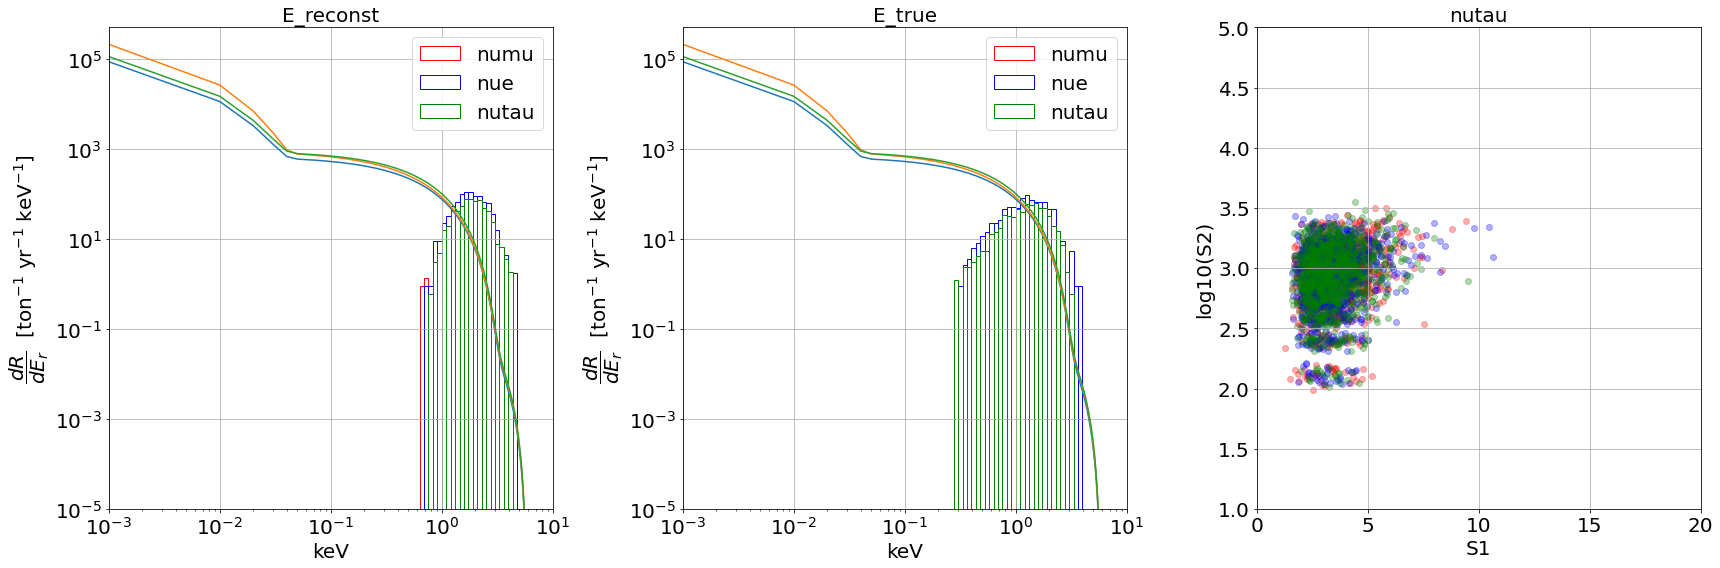

In [11]:
fig, ax = plt.subplots(1,3,  figsize = (8*3, 8))


bins = np.logspace(np.log10(0.001), np.log10(10), 101)
bins_centers = (bins[1:]+bins[:-1])/2
colors = ['red','blue', 'green']
for p, spctrum_type in enumerate(spctrum_types):
    
    if spctrum_type == 'nue':
        valid_Er_keV, valid_pdf = Er_nucleus, dNdE_nue
    elif spctrum_type == 'numu':
        valid_Er_keV, valid_pdf = Er_nucleus, dNdE_numu
    elif spctrum_type == 'nutau':
        valid_Er_keV, valid_pdf = Er_nucleus, dNdE_nutau
    
    valid_Er_keV*=unit_Er
    valid_pdf*=unit_pdf
    eventR = max(get_cdf(valid_pdf[:-1], np.diff(valid_Er_keV), ''))

    data, eff_num = get_data(folder, spctrum_type, nuclei, numevent, footnote)
    E_reconst, S1, S2, _,_, E_true = data.T

    counts_reconst, _ = np.histogram(E_reconst, bins)
    counts_true, _ = np.histogram(E_true, bins)
    
    hist_reconst = counts_reconst/unit_Er/eff_num * eventR
    hist_true = counts_true/unit_Er/eff_num * eventR
    
    ax[0].bar(bins_centers, hist_reconst.value,  np.diff(bins), 
              color = (1,1,1), edgecolor = colors[p], alpha = 1, label = spctrum_type)
    ax[1].bar(bins_centers, hist_true.value,  np.diff(bins), 
               color = (1,1,1), edgecolor = colors[p], alpha = 1, label = spctrum_type)
    
    
  
    ax[0].semilogy(valid_Er_keV, valid_pdf)
    ax[1].semilogy(valid_Er_keV, valid_pdf)
    
    ax[0] = setup_cdfpdf_ax(ax[0], 'E_reconst','keV', '', True, 'pdf', 20, 20, 
                            vlines = [0], hlines = [0], xlims = [1e-3 ,10], 
                             ylims = [1e-5, 5e5], log = [1,1])
    ax[1] = setup_cdfpdf_ax(ax[1], 'E_true','keV', '', True, 'pdf', 20, 20, 
                            vlines = [0], hlines = [0], xlims = [1e-3 ,10], 
                             ylims = [1e-5, 5e5], log = [1,1])
    
    ax[0].legend(fontsize = 20)
    ax[1].legend(fontsize = 20)
    
    ax[2].scatter(S1, np.log10(S2), alpha = 0.3, c = colors[p])
    
    
    ax[2] = setup_cdfpdf_ax(ax[2], spctrum_type,'S1', 'log10(S2)', True, '', 20, 20, 
                            vlines = [0], hlines = [0], xlims = [0,20], 
                             ylims = [1,5], log = [0,0])
fig.tight_layout()

In [12]:
save_path = '../generate_S1S2files'
save_name = os.path.join(save_path, 'CF_flux_S1S2.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../generate_S1S2files/CF_flux_S1S2.pdf
